# Part 1

In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_samples,silhouette_score, calinski_harabasz_score
from sklearn.pipeline import Pipeline
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Part 2

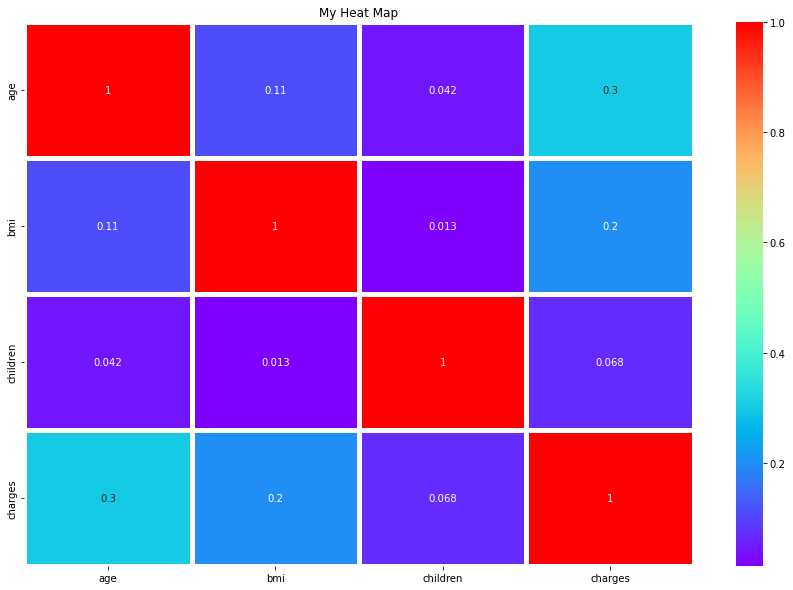

In [4]:
fig, ax=plt.subplots(figsize= (15,10))
sns.heatmap(df.corr(), cmap='rainbow', annot=True, linewidth=5).set_title('My Heat Map')
plt.show()

1. There is a very slight correlation(0.2) between charges BMI and charges.
2. There is a low correlation 0f 0.11 between age and BMI.
3. There is a slightly higher correlation of 0.3 between age and charges.

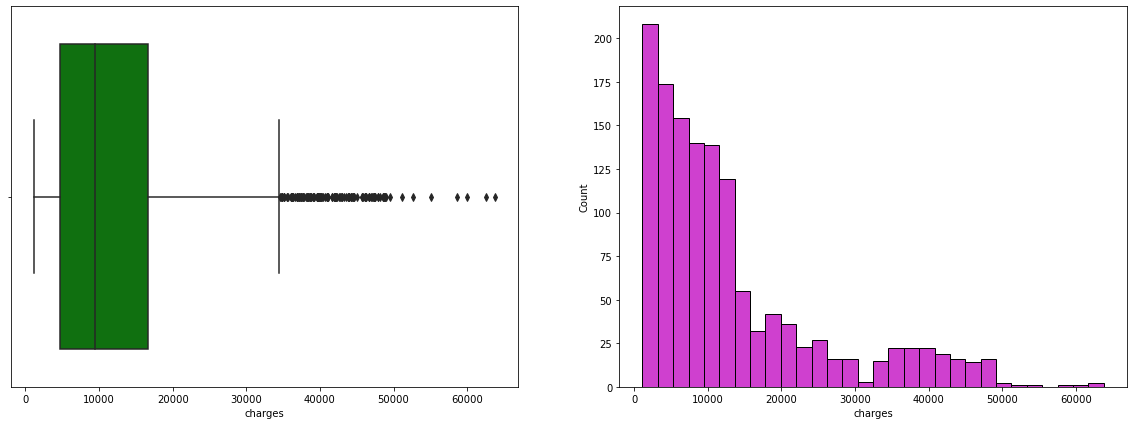

In [5]:
fig, ax = plt.subplots(1, 2, figsize= (20, 7))              
sns.histplot(x = df["charges"], ax =ax[1], color = "m") 
sns.boxplot(x = df["charges"], ax = ax[0], color = "g")
plt.show()

In [6]:
df1 = df.copy()
df1['health'] = df['bmi']
ind=np.where(df1['health']<18.5)
ind1=np.where((df1['health']>=18.5) & (df1['health']<25))
ind2=np.where((df1['health']>=25) & (df1['health']<30))
ind3=np.where(df1['health']>=30)
df1['health'].iloc[ind]='underweight'
df1['health'].iloc[ind1]='normalweight'
df1['health'].iloc[ind2]='overweight'
df1['health'].iloc[ind3]='obese'

In [7]:
df1

,age,sex,bmi,children,smoker,region,charges,health
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normalweight
4,32,male,28.880,0,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,obese
1334,18,female,31.920,0,no,northeast,2205.98080,obese
1335,18,female,36.850,0,no,southeast,1629.83350,obese
1336,21,female,25.800,0,no,southwest,2007.94500,overweight


In [8]:
df1['health'].unique()

array(['overweight', 'obese', 'normalweight', 'underweight'], dtype=object)

In [12]:
group = df1.groupby(by=['region'])['health'].value_counts().reset_index(name="count")
group

,region,health,count
0,northeast,obese,143
1,northeast,overweight,98
2,northeast,normalweight,73
3,northeast,underweight,10
4,northwest,obese,148
5,northwest,overweight,107
6,northwest,normalweight,63
7,northwest,underweight,7
8,southeast,obese,243
9,southeast,overweight,80


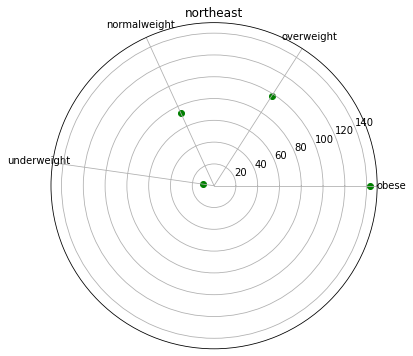

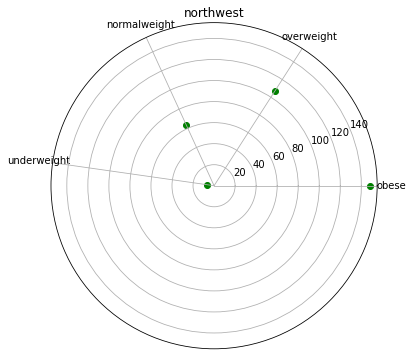

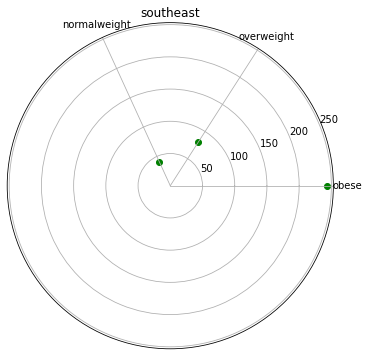

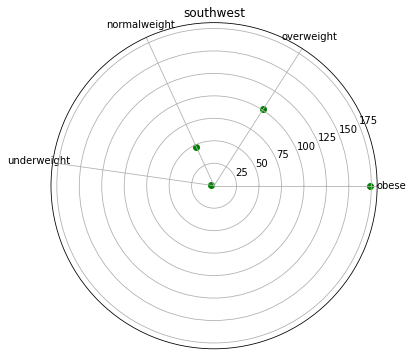

In [13]:
region1 = ['northeast','northwest','southeast','southwest']
for i in region1:
    group1 = group[grp['region'] == i]
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='polar')
    ax.scatter(group1['health'],group1['count'],c='g')
    plt.title(i)
    plt.show()

# Part 3

In [15]:
df2 = df.drop(['sex','smoker','region'], axis=1)
df2

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [16]:
model = StandardScaler()
df_scaled = model.fit_transform(df2)
df_std = pd.DataFrame(df_scaled, columns=df2.columns)
df_std

,age,bmi,children,charges
0,-1.438764,-0.453320,-0.908614,0.298584
1,-1.509965,0.509621,-0.078767,-0.953689
2,-0.797954,0.383307,1.580926,-0.728675
3,-0.441948,-1.305531,-0.908614,0.719843
4,-0.513149,-0.292556,-0.908614,-0.776802
...,...,...,...,...
1333,0.768473,0.050297,1.580926,-0.220551
1334,-1.509965,0.206139,-0.908614,-0.914002
1335,-1.509965,1.014878,-0.908614,-0.961596
1336,-1.296362,-0.797813,-0.908614,-0.930362


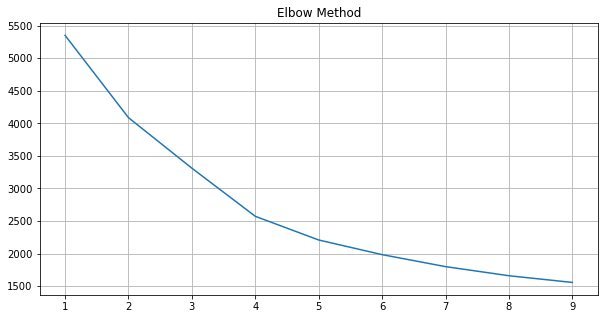

In [17]:
distortion = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(df_std)
    distortion.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize = (10,5))
plt.plot(range(1,10), distortion)
plt.grid(True)
plt.title('Elbow Method')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.23439977560956812
For n_clusters = 3 The average silhouette_score is : 0.25720042552658645
For n_clusters = 4 The average silhouette_score is : 0.2944245314180033
For n_clusters = 5 The average silhouette_score is : 0.28250425289434755
For n_clusters = 6 The average silhouette_score is : 0.25666241382415156
For n_clusters = 7 The average silhouette_score is : 0.26173037303727587
For n_clusters = 8 The average silhouette_score is : 0.2628244902302
For n_clusters = 9 The average silhouette_score is : 0.25472179042368503


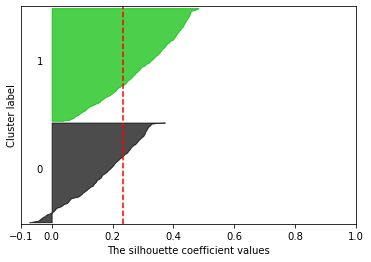

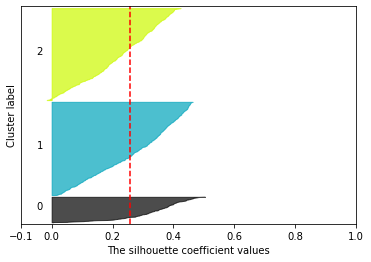

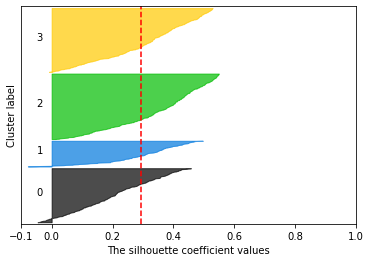

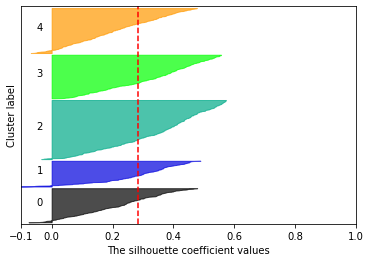

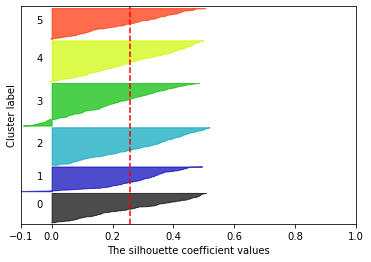

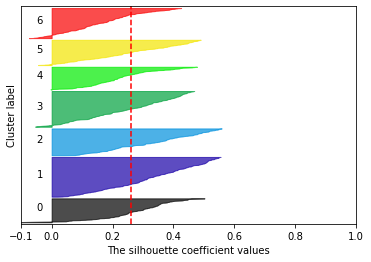

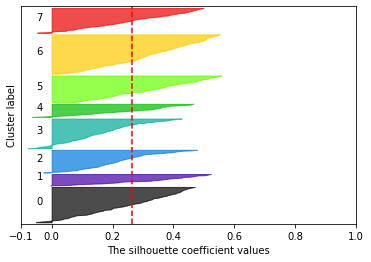

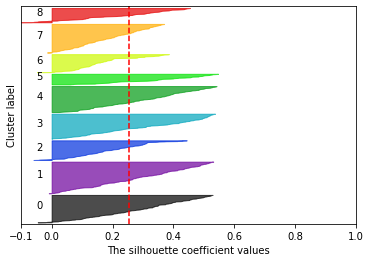

In [18]:
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_std) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_std)

    silhouette_avg = silhouette_score(df_std, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(df_std, cluster_labels)                 

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
    
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))                                                       
        y_lower = y_upper + 10                                         

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])                                          
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

Here 4 clusters is giving the best silhouette score. Therefore we will consider k = 4.

Centroids : 
 [[-1.08637528 -0.17423644]
 [ 1.36859725 -0.40745967]
 [ 0.66660629  2.13980634]
 [ 0.05071418 -0.45074812]]


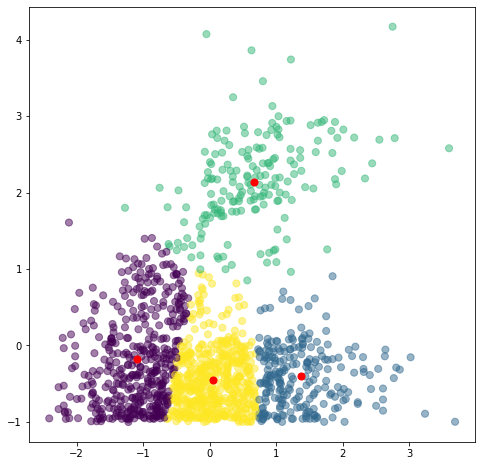

In [25]:
kmeans = KMeans(n_clusters=4, n_init=4, random_state = 3).fit(df_std[['bmi','charges']])
centroids = kmeans.cluster_centers_
cluster = kmeans.fit_predict(df_std[['bmi','charges']])
print('Centroids : \n',centroids)
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(df_std['bmi'], df_std['charges'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

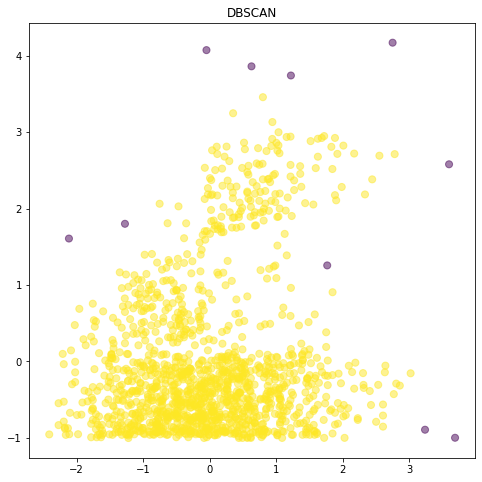

In [26]:
from sklearn.cluster import DBSCAN 

db = DBSCAN().fit(df_std[['bmi','charges']])
Labels1 = db.labels_
plt.figure(figsize=(8, 8))
plt.scatter(df_std['bmi'], df_std['charges'], c= db.labels_.astype(float), s=50, alpha=0.5)
plt.title('DBSCAN')
plt.show()

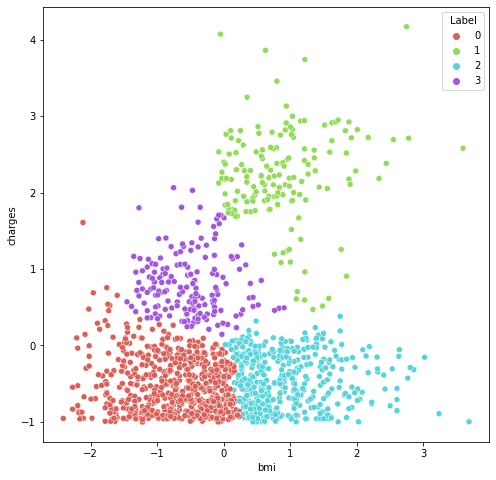

In [74]:
model = AgglomerativeClustering(n_clusters=4, linkage='ward')
cluster = model.fit_predict(df_std[['bmi','charges']])
df['Label'] = model.labels_
pred = model.fit_predict(df_std[['bmi','charges']])
plt.figure(figsize=(8, 8))
sns.scatterplot(df_std['bmi'], df_std['charges'], hue=df['Label'],palette=sns.color_palette('hls', np.unique(model.labels_).shape[0]))
plt.xlabel('bmi')
plt.ylabel('charges')
plt.show()

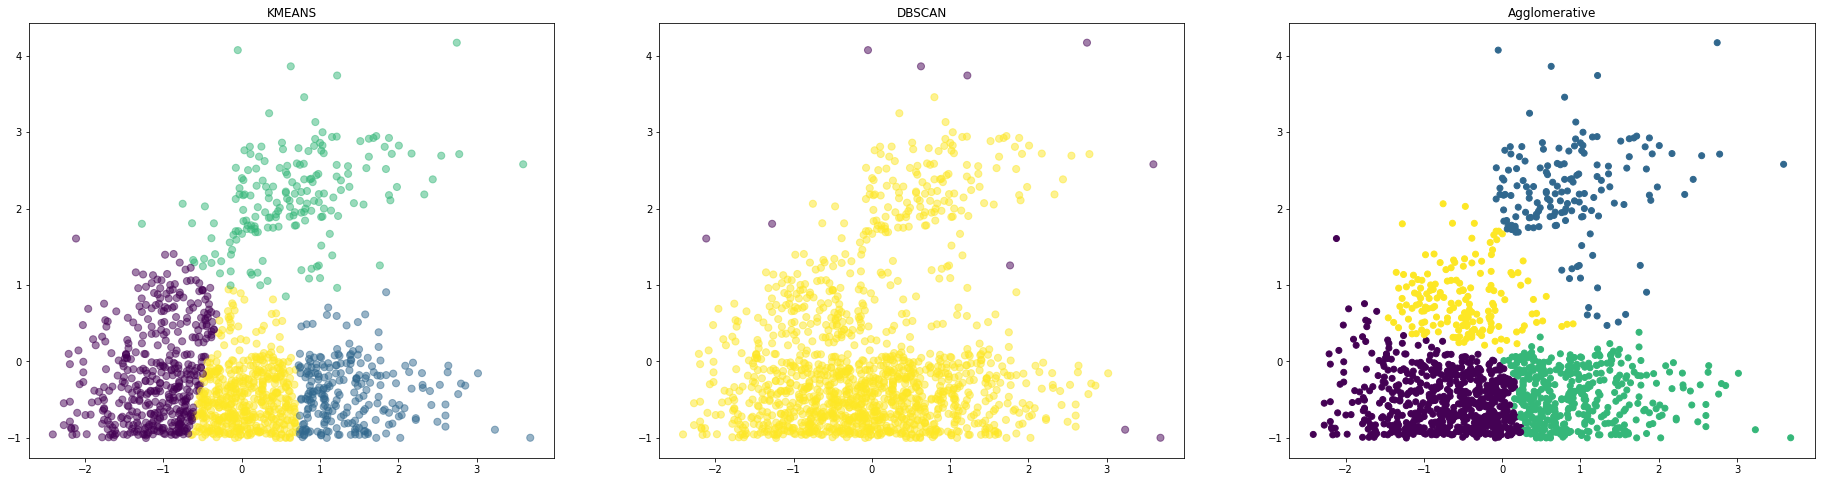

In [37]:
fig, ax = plt.subplots(1, 3, figsize = (32, 8))
ax[0].scatter(df_std['bmi'], df_std['charges'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
ax[0].set_title('KMEANS')
#ax[0].scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, ax=ax[0])
ax[1].scatter(df_std['bmi'], df_std['charges'], c= db.labels_.astype(float), s=50, alpha=0.5)
ax[1].set_title('DBSCAN')
ax[2].scatter(df_std['bmi'], df_std['charges'], c= pred)
ax[2].set_title('Agglomerative')
plt.show()

Here, the agglomerative method is performing better as the cluster are well seperated and distributed as well it is also able to identify outliers.

In [73]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Label
0,19,female,27.900,0,yes,southwest,16884.92400,3
1,18,male,33.770,1,no,southeast,1725.55230,2
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,3
4,32,male,28.880,0,no,northwest,3866.85520,0


### Customer clusters:
1. cluster 0 - Low BMI Low Charges
2. cluster 1 - high BMI high Charges
3. cluster 2 - high BMI low Charges
4. cluster 3 - mid BMI mid Charges

# Part 4

In [54]:
from sklearn.model_selection import train_test_split
X_data = df_std.iloc[:,0:-1]
Y_data = df_std.iloc[:,-1]

X_train, X_test, Y_train, Y_test = \
train_test_split(X_data, Y_data, test_size=0.25, random_state=0)

print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

           age       bmi  children
1075 -0.513149 -0.176085 -0.078767
131   1.551686 -1.414621 -0.908614
15   -1.438764 -0.994667 -0.078767
1223 -1.367563 -1.024195 -0.908614
1137 -0.940356 -1.383452 -0.908614
...        ...       ...       ...
763  -0.869155 -0.760083 -0.908614
835   0.198863  0.870519  0.751079
1216  0.056461 -0.915925 -0.908614
559  -1.438764  0.798339 -0.908614
684  -0.441948 -1.995338 -0.078767

[1003 rows x 3 columns]
           age       bmi  children
578   0.910875 -0.076018 -0.078767
610   0.554869 -0.212175 -0.078767
569   0.626070  1.624303  0.751079
1034  1.551686  1.265866 -0.908614
198   0.839674 -2.069158 -0.908614
...        ...       ...       ...
574   1.266881  0.595744  0.751079
1174 -0.726752  0.237307  0.751079
1327  0.839674 -0.103905 -0.078767
817  -1.153959  1.055889  1.580926
1337  1.551686 -0.261388 -0.908614

[335 rows x 3 columns]
1075   -0.719309
131     0.028577
15     -0.944463
1223    1.061936
1137   -0.833848
          ...   
763    -0

In [55]:
lm = LinearRegression()
reg = lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)
predictions

array([ 0.20533459,  0.09580809,  0.44597661,  0.51484149, -0.16858749,
       -0.38808422, -0.54963489,  0.44927797,  0.06459486, -0.03857371,
       -0.28533534,  0.12472848,  0.03788507, -0.33285883, -0.33530006,
        0.22692243,  0.1473529 , -0.19989319, -0.01297496, -0.40538775,
        0.10706109,  0.42042054,  0.16818313,  0.00356329, -0.29310221,
        0.02727418, -0.59634823,  0.16954291, -0.33284348,  0.14217785,
        0.06234096,  0.60187835,  0.50824251,  0.38132037, -0.58711457,
       -0.29614836,  0.35085333, -0.06708756,  0.1100059 , -0.34034526,
       -0.39033812, -0.31367604, -0.17396741,  0.53394972, -0.28759948,
       -0.23010876,  0.21871439, -0.06906048, -0.3910717 ,  0.13950754,
       -0.24809004, -0.32986696,  0.0795087 ,  0.46581841,  0.5493134 ,
       -0.14503048, -0.18095639,  0.02157307,  0.14470452,  0.20129353,
       -0.47253675,  0.50776908,  0.52780707,  0.27595537,  0.43098601,
        0.41887562, -0.43398384,  0.0441285 , -0.49848675,  0.17

In [56]:
MSE= mean_squared_error(predictions,Y_test)
print('MSE =', MSE)

MSE = 0.9050446222370268


In [57]:
encoder = preprocessing.LabelEncoder()

encoder.fit(df.sex)
print(encoder.classes_)
X_data['sex'] = encoder.transform(df.sex)

encoder.fit(df.smoker)
print(encoder.classes_)
X_data['smoker'] = encoder.transform(df.smoker)

X_data

['female' 'male']
['no' 'yes']


,age,bmi,children,sex,smoker
0,-1.438764,-0.453320,-0.908614,0,1
1,-1.509965,0.509621,-0.078767,1,0
2,-0.797954,0.383307,1.580926,1,0
3,-0.441948,-1.305531,-0.908614,1,0
4,-0.513149,-0.292556,-0.908614,1,0
...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,1,0
1334,-1.509965,0.206139,-0.908614,0,0
1335,-1.509965,1.014878,-0.908614,0,0
1336,-1.296362,-0.797813,-0.908614,0,0


In [58]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X_data, Y_data, test_size=0.25, random_state=0)

print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

           age       bmi  children  sex  smoker
1075 -0.513149 -0.176085 -0.078767    0       0
131   1.551686 -1.414621 -0.908614    0       0
15   -1.438764 -0.994667 -0.078767    1       0
1223 -1.367563 -1.024195 -0.908614    0       1
1137 -0.940356 -1.383452 -0.908614    0       0
...        ...       ...       ...  ...     ...
763  -0.869155 -0.760083 -0.908614    1       0
835   0.198863  0.870519  0.751079    1       0
1216  0.056461 -0.915925 -0.908614    1       0
559  -1.438764  0.798339 -0.908614    1       0
684  -0.441948 -1.995338 -0.078767    0       0

[1003 rows x 5 columns]
           age       bmi  children  sex  smoker
578   0.910875 -0.076018 -0.078767    1       0
610   0.554869 -0.212175 -0.078767    0       0
569   0.626070  1.624303  0.751079    1       1
1034  1.551686  1.265866 -0.908614    1       0
198   0.839674 -2.069158 -0.908614    0       0
...        ...       ...       ...  ...     ...
574   1.266881  0.595744  0.751079    0       0
1174 -0.726752 

In [59]:
lm = LinearRegression()
reg = lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)
predictions

array([-0.14978126, -0.27627902,  2.02372125,  0.21336812, -0.52301106,
       -0.78933345, -0.99491299,  0.06139391, -0.36917516, -0.49160074,
       -0.74318948, -0.25936199, -0.34571974, -0.73496428,  1.20147475,
       -0.17278687, -0.17219145, -0.63111041, -0.4290899 ,  1.1125771 ,
        1.67698938,  0.06259257, -0.16949139,  1.59906941, -0.71733895,
       -0.38062947, -1.0210741 , -0.25519821, -0.73946077, -0.25146638,
       -0.36701356,  2.23116763,  0.2087414 ,  0.06056346,  0.93107817,
       -0.70344274, -0.03155438,  1.46346922,  1.65426558, -0.77210416,
       -0.78814842, -0.7230044 ,  1.39682531,  2.13804276,  1.22994526,
       -0.69490083, -0.18134814, -0.45854733, -0.82246777, -0.20813646,
       -0.66911002, -0.82348128,  1.66149924,  2.03019242,  0.24157819,
       -0.5493575 , -0.59134197, -0.32594669, -0.31339358, -0.13594621,
       -0.91126414,  2.09974377,  0.16458532, -0.10065054,  0.01650589,
        0.06971661,  1.08049413,  1.54620678, -0.97482835, -0.27

In [60]:
MSE= mean_squared_error(predictions,Y_test)
print('MSE =', MSE)

MSE = 0.2200032210706655


As we can see, after considering the categorical columns the result is improving.

In [70]:
dtm = DecisionTreeRegressor(max_depth=4,min_samples_split=5,max_leaf_nodes=10)

dtm.fit(X_train,Y_train)
print("R-Squared on train dataset={}".format(dtm.score(X_test,Y_test)))

pred=dtm.predict(X_test)
print("MSE for decision tree:", mean_squared_error(pred,Y_test))

R-Squared on train dataset=0.8820138096747815
MSE for decision tree: 0.126755477833115


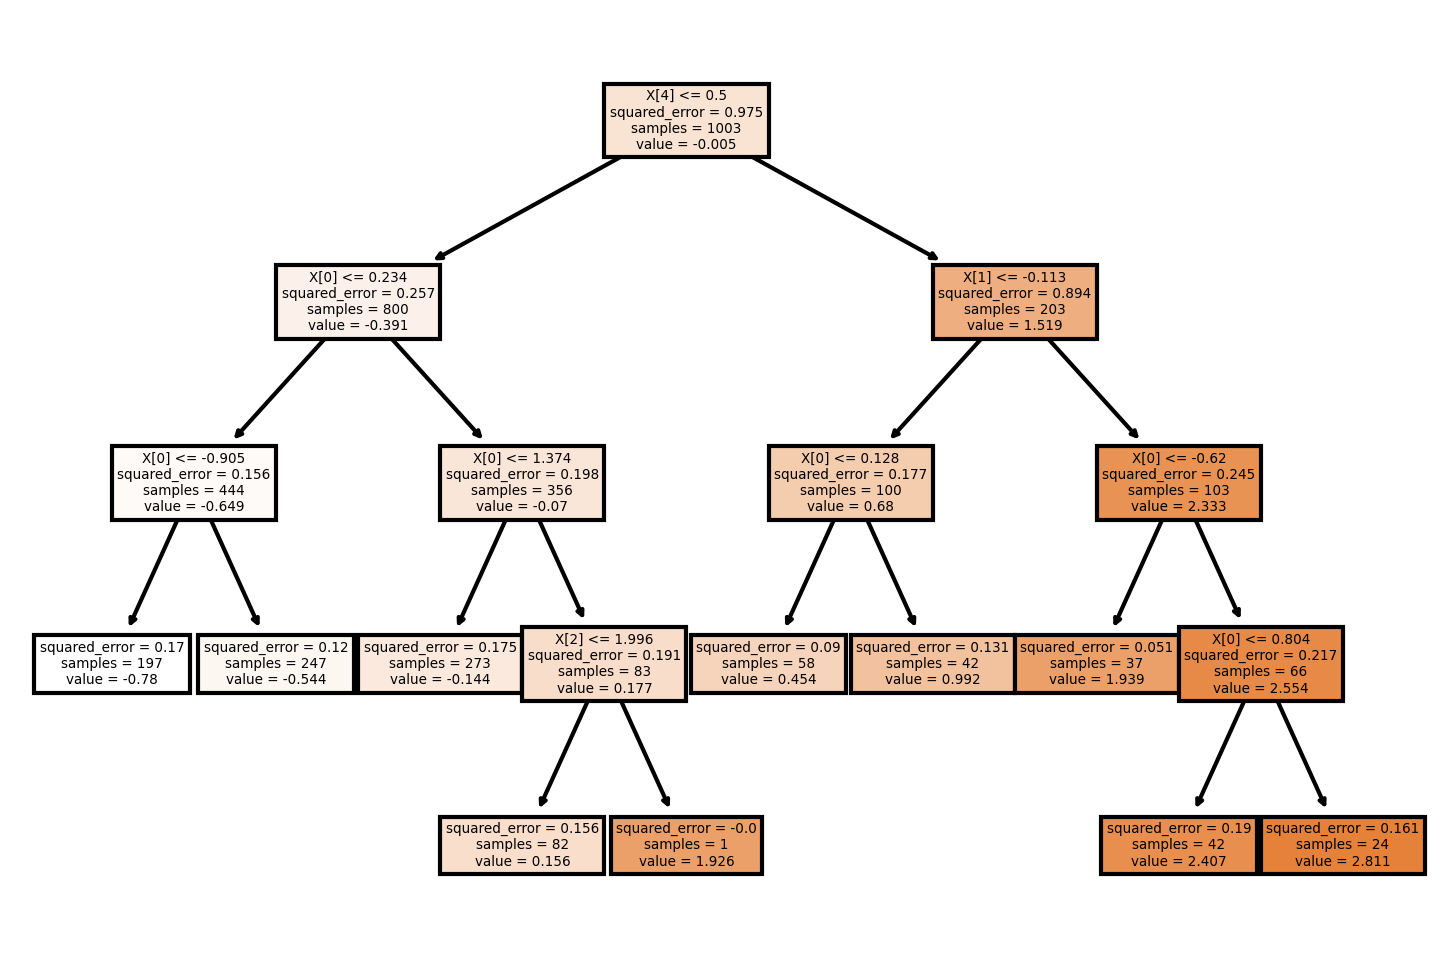

In [69]:
fig, axes = plt.subplots(dpi=300)

tree.plot_tree(dtm,filled = True)
plt.show()